# Map PDF protocol demo

This demo is intended to show the capability and general workflow of the mapPDF protocol as described in [insert link to paper]. It is intended as a quick start solution for a novel python user who doesn't want to create a similar solution from scratch.

## Introduction:

The mapPDF protocol was developed as a responce to increasing data quantity during modern total scattering experiments. The main idea is to address the problem of disjointed analysis workflows where different aspects of data reduction and modelling end up in various locations and formats. For questions and help with mapPDF post questions at https://groups.google.com/forum/#!forum/diffpy-users

This protocol attempts to simplify the process of handling large sets of experimental files and create one "collection" of information from which further analysis would be possible. The collection contains all of the essential metadata about the experiment, the data and the analysis results.

The demo provides an example of a typical workflow, shows how to create and provides a few suggestions on how to use the "collection". It should be run from the demo directory in the mapPDF download folder and uses data in the example_data subdirectory.   This demo script may be adapted for your data.  To do this, copy and paste this demo ipynb and the mappdf_utils.py file to the directory containing the data, and make appropriate edits so the scripts can find your data.

The current implementation is aimed at users of the XPD beamline at NSLSII but can be readily extended to other sources by the user through it's transparent structure and use of easily available python packages.

### Overall workflow:

1. Set up the paths to metadata and images / data files.
2. Load the data into a "collection" dataframe including that information.
3. Transform data to PDF
4. Use pearsonr to screen the dataset.
5. Set up a structure refinement and apply it to the dataset
6. Visualize refined parameters.
7. Adjust/improve model

It was designed to work with output files from the XPD beamline at NSLSII.
Output from other instruments can be used given the general metadata format is the same, or if the user is willing to adjust the import script. Once set up, the protocol is intended to work with minimal adjustments between the experiments.

### Requirements:

For this to run you will need:

Python3 (e.g., Anaconda Python) with following packages: 
numpy, pandas, matplotlib, scipy

You would also need the pdfGetX3 package installed (http://www.diffpy.org/products/pdfgetx3.html).


### Installation:

Make sure you have all the required packages installed into your python environment and have downloaded the demo folder containing 'mappdf_utils.py' together with the data files required for the demo located in 'example_data' folder. See above for details.



### Continue with the demo:

### Main imports for mapPDF
The demo utilizes a number of standard python packages as well as custom functions from 'mappdf_utils.py'

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from diffpy.pdfgetx import PDFGetter, PDFConfig

# utilities for mapPDF
from mappdf_utils import *

### Define filepath to informations
The following cells sets the paths to the text document with the metadata and points towards the location of the I(q) files. 

#### This is the only parameter that needs to change between datasets apart from the model

In [2]:
# defined example files
meta_data_file = 'example_data/metadata_output.txt'
chi_files_dir = 'example_data/chi/'

Next, we define the parameters for PDF transformation

In [3]:
pdf_params = dict(qmaxinst=22, qmin=0.8, qmax=17, dataformat='Qnm',
                   rmin=0.0, rmax=100.0, rstep=0.01)

### Load raw I(Q) data
Then we define which columns from the metadata file we are interested in by defining a qoi_columns list. A single function then reads in the desired information together with the corresponding '.chi' files. We then store everything in our collection dataframe 'df'

In [4]:
qoi_colmns  = ['diff_x', 'diff_y', 'filename', 'composition']

df = mappdf_load_chi(meta_data_file, qoi_columns=qoi_colmns, root=chi_files_dir)

### Transform data to PDF
We create G(r) from each entry in the collection 'df' using the parameters defined above. We designate file nr. 15 as our background as well as point for comparison for raw I(q) and G(r) using Pearsonr test.

In [5]:
# process the data
bgr = 15
process_chi_df(df, pdf_params, 
               background=bgr, iq_pearson_data=bgr, gr_pearson_data=bgr);

/Users/Anton/anaconda/envs/cmi/lib/python2.7/site-packages/diffpy.pdfgetx-1.1-py2.7.egg/diffpy/pdfgetx/transformsqnormrpoly.py:138: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


-0.8226704844554376


mappdf_utils.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **pdf_parameters)[1]


We can check the contents of the collection at any point using the standard function in the next cell

In [6]:
# view the first 5 rows for example
df.head()

,diff_x,diff_y,filename,composition,q,iq,iq_pearson,corrected_iq,gr,gr_pearson
0,9.4,25.44,Catalyst_Array_DenseMap_075785_0001.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 5.7301698, 5.7302208...",0.994051,"[-15.0, -15.0, -15.0, -15.0, -15.0, -9.2698302...","[0.0, 0.00267066384708308, 0.00529514275328859...",0.996530
1,9.4,24.44,Catalyst_Array_DenseMap_075785_0002.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 4.0435905, 4.0436268...",0.999791,"[-15.0, -15.0, -15.0, -15.0, -15.0, -10.956409...","[0.0, 0.0023896755484196647, 0.004735573129573...",0.996453
2,9.4,23.44,Catalyst_Array_DenseMap_075785_0003.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 5.0133491, 5.0133934...",0.999713,"[-15.0, -15.0, -15.0, -15.0, -15.0, -9.9866509...","[0.0, 0.005666086358941925, 0.0111995012741863...",0.996371
3,9.4,22.44,Catalyst_Array_DenseMap_075785_0004.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 4.7433209, 4.7433634...",0.999648,"[-15.0, -15.0, -15.0, -15.0, -15.0, -10.256679...","[0.0, -0.0010471512110998087, -0.0020619335712...",0.995426
4,9.4,21.44,Catalyst_Array_DenseMap_075785_0005.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 3.9600918, 3.9601269...",0.999454,"[-15.0, -15.0, -15.0, -15.0, -15.0, -11.039908...","[0.0, 0.002332464983574279, 0.0046221213556670...",0.994345


### Collection screening using Pearson maps for I(Q)
We can check for similarity to our background file using standar matplotlib functionality

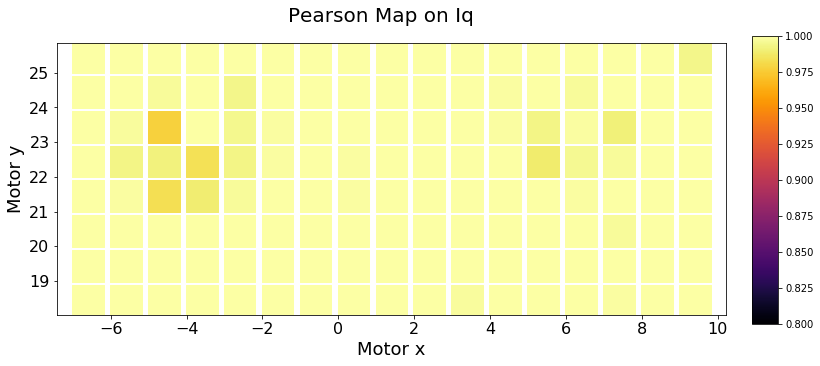

In [8]:
# Create new figure:
fig, ax = plt.subplots(1,1, figsize=(12, 5), sharey=True)


# Plot the data :
im = ax.scatter(df['diff_x'], df['diff_y'], c=df['iq_pearson'], vmin=.8, marker='s', s=1000)


## Set axis labels and style
fig.suptitle('Pearson Map on Iq', fontsize=20)
cax = fig.add_axes((0.93,0.1,0.03,0.8))
ax.set_ylabel('Motor y')
ax.set_xlabel('Motor x')
conf_label_size(ax, 18)
conf_tick_size(ax, 16)
fig.colorbar(im, cax=cax)
plt.set_cmap('inferno')

Unsurprisingly, all datasets are very similar, since the amount of material is very low and the background signal dominates the measurement.

### Pearson map of G(r)
We can however examine the background subtracted and transformed to PDF datasets, using the same functions as before. Now there is clear contranst between signal from support material and the nanomaterial.

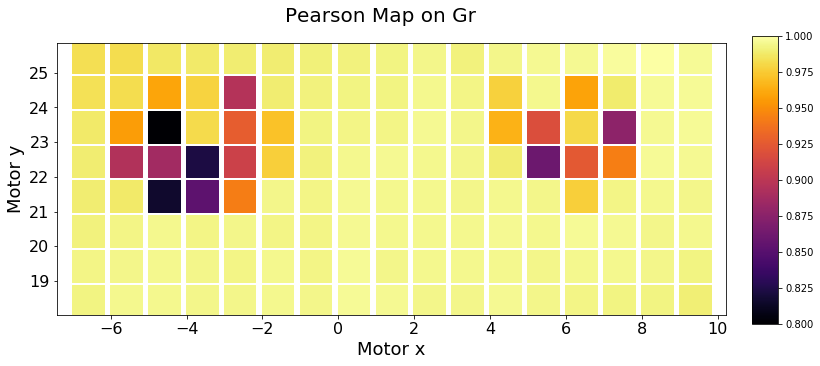

In [9]:
# create scatter plot with pearson map
# Create new figure:
fig, ax = plt.subplots(1,1, figsize=(12, 5), sharey=True)


# Plot data:
im = ax.scatter(df['diff_x'], df['diff_y'], c=df['gr_pearson'], vmin=.8, marker='s', s=1000)


## Set axis labels and figure style:
fig.suptitle('Pearson Map on Gr', fontsize=20)
cax = fig.add_axes((0.93,0.1,0.03,0.8))
ax.set_ylabel('Motor y')
ax.set_xlabel('Motor x')
conf_label_size(ax, 18)
conf_tick_size(ax, 16)
plt.set_cmap('inferno')
fig.colorbar(im, cax=cax)

# PDF refinements
Now that we have everything in one collection dataframe, it is easy to apply a fit recipe to each entry and append the results. The exact fit recipe will vary from one experiment to the other. The general approach however is similar to the initial steps of building the dataframe.

For questions and help with mapPDF post questions at https://groups.google.com/forum/#!forum/diffpy-users

### Load refinements from disk
In order to save time for the demonstration purposes, the refinements to an FCC model were performed and the collection was saved to a file. Here we load a file containing the results called 'refined_params.csv to a collection dataframe called 'rf' and continue the demo.

In [10]:
rf = pd.read_csv('example_data/refined_params.csv')
print(list(rf.keys())) # print the column entries in the refined parameters file

['file_index', 'adp_1', 'adp_2', 'delta2', 'lattice constant', 'rw', 'scale', 'psize']


We recreate the total collection dataframe by joining the refinement results with the collection we created earlier. For ease of use we call it by a variable name 'd'

In [11]:
d = pd.concat([df, rf], axis=1, join='inner')

# Make a heatmap of rw values using python and matplotlib functionality

We can now visualize the refined parameters for the dataset.

Here is an example of the heatmap plot using simple interation over the collection. 

###### We will use matplotlib package to generate plots, however any kind of visualization software can be used after the collection has been saved as a .csv
The collection can be saved to a text file using d.to_csv() function. See pandas documentation

In [12]:
d.head(1) # show the first entry in the collection

,diff_x,diff_y,filename,composition,q,iq,iq_pearson,corrected_iq,gr,gr_pearson,file_index,adp_1,adp_2,delta2,lattice constant,rw,scale,psize
0,9.4,25.44,Catalyst_Array_DenseMap_075785_0001.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 5.7301698, 5.7302208...",0.994051,"[-15.0, -15.0, -15.0, -15.0, -15.0, -9.2698302...","[0.0, 0.00267066384708308, 0.00529514275328859...",0.99653,0,0.00001,0.000008,27.627181,4.261763,0.899584,0.015228,34.331036


#### Generate the plot of model agreement score Rw

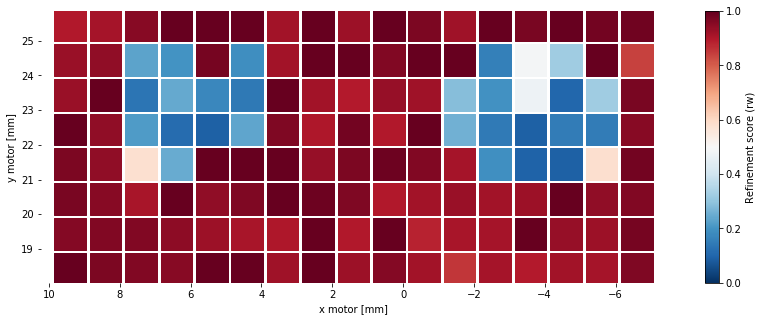

In [13]:
## define the size of the figure plot
plt.figure(figsize=(14,5))


## perform the iteration
plt.scatter(d['diff_x'], d['diff_y'], c=d['rw'], cmap='RdBu_r', vmin=0, vmax=1, marker='s', s=1000)

    
# add the colorbar
plot = plt.colorbar()

# Set labels
plt.ylabel('y motor [mm]')
plt.xlabel('x motor [mm]')
plot.set_label('Refinement score (rw)')
    
# remove the box around the graph
plt.gca().invert_xaxis()
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#### Generate the filtered plot of crystallite size based on a criteria for Rw < 0.3:

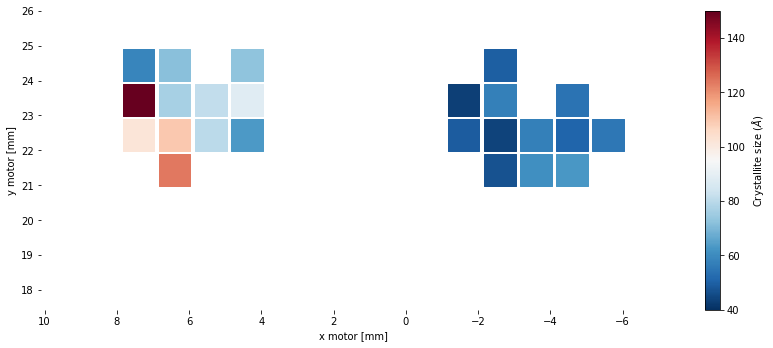

In [14]:
## define the size of the figure plot
plt.figure(figsize=(14,5.5))

## perform the iteration
where = d['rw']<0.3 # define the filter criteria
plt.scatter(d['diff_x'][where], d['diff_y'][where], c=d['psize'][where], cmap = 'RdBu_r', vmin = 40, vmax = 150, marker = 's',s=1000)

    
# add the colorbar
plot = plt.colorbar()

#keep the limits as before
plt.xlim(-7.2,10.1)
plt.ylim(17.43,26)

# Set labels
plt.ylabel('y motor [mm]')
plt.xlabel('x motor [mm]')
plot.set_label('Crystallite size ($\AA$)')
    
# remove the box around the graph
plt.gca().invert_xaxis()
for spine in plt.gca().spines.values():
    spine.set_visible(False)

## Example of multiple filtering:

It is easy to define multiple criteria for filtering as well as making multiple 1D slices of the collection. Here we visualize the diffraction patterns for two arbitrary sets of refinements that we define ourselves. First we filter out all the diffraction patterns with better structural refinement results, with rw < 60%. Then, we isolate the rest, i.e. 60% < rw < 100% 


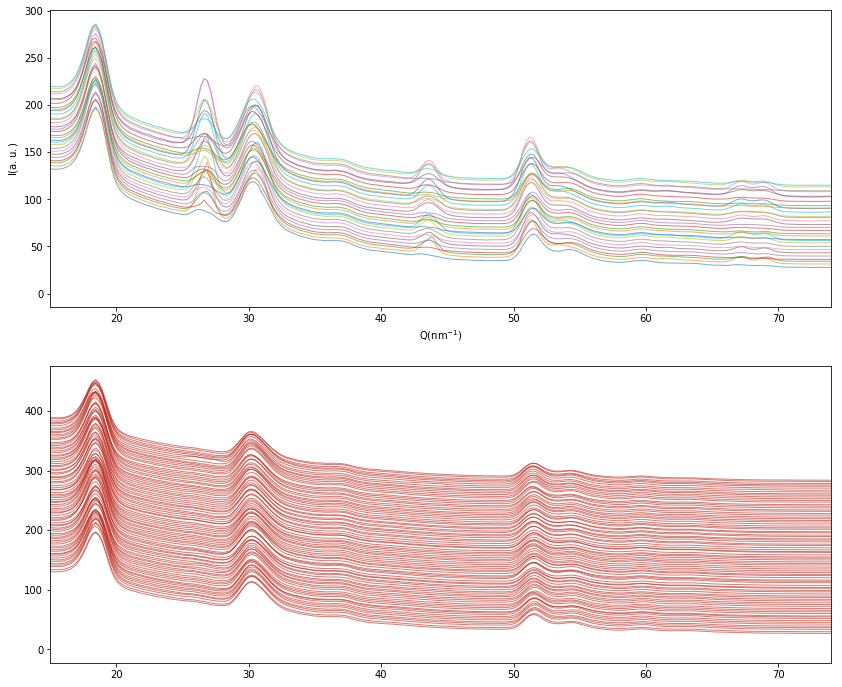

In [15]:
# make a figure
fig, ((ax1,ax2)) = plt.subplots(2, 1, figsize=[14,12])
offset_plot1=0
offset_plot2=0


## perform iteration and filtering by a criteria
x = d['q']
y = d['iq']
rw = d['rw']

for i in range(len(d)):
    if np.all(rw[i] < 0.6):
        ax1.plot(x[i], y[i] + offset_plot1, lw=1,alpha=0.6)
        offset_plot1=offset_plot1+3
        
    elif np.all(rw[i] < 1):
        ax2.plot(x[i], y[i] + offset_plot2, lw=1,alpha=0.6,color='#bb271c')
        offset_plot2=offset_plot2+3
        
# set limits to focus on the part of the diffration part
ax1.set_xlim(15,74)
ax2.set_xlim(15,74)
# set labels for x and y axes
ax1.set_ylabel('I($\mathrm{a.u.}$)');
ax1.set_xlabel('Q($\mathrm{nm^{-1}}$)');

In [16]:
d.iloc[[0]] # locate a particular entry in the collection

,diff_x,diff_y,filename,composition,q,iq,iq_pearson,corrected_iq,gr,gr_pearson,file_index,adp_1,adp_2,delta2,lattice constant,rw,scale,psize
0,9.4,25.44,Catalyst_Array_DenseMap_075785_0001.chi,CPtCu,"[0.1204624, 0.36138719, 0.60231203, 0.8432368,...","[0.0, 0.0, 0.0, 0.0, 0.0, 5.7301698, 5.7302208...",0.994051,"[-15.0, -15.0, -15.0, -15.0, -15.0, -9.2698302...","[0.0, 0.00267066384708308, 0.00529514275328859...",0.99653,0,0.00001,0.000008,27.627181,4.261763,0.899584,0.015228,34.331036


## Plot ideas:

You can add other datasets for comparison and add annotations to create more informative figures. Here we add a background file to compare with the filtered contents of the collection from the previous plot to see the main differences between datasets that include material and those that dont.

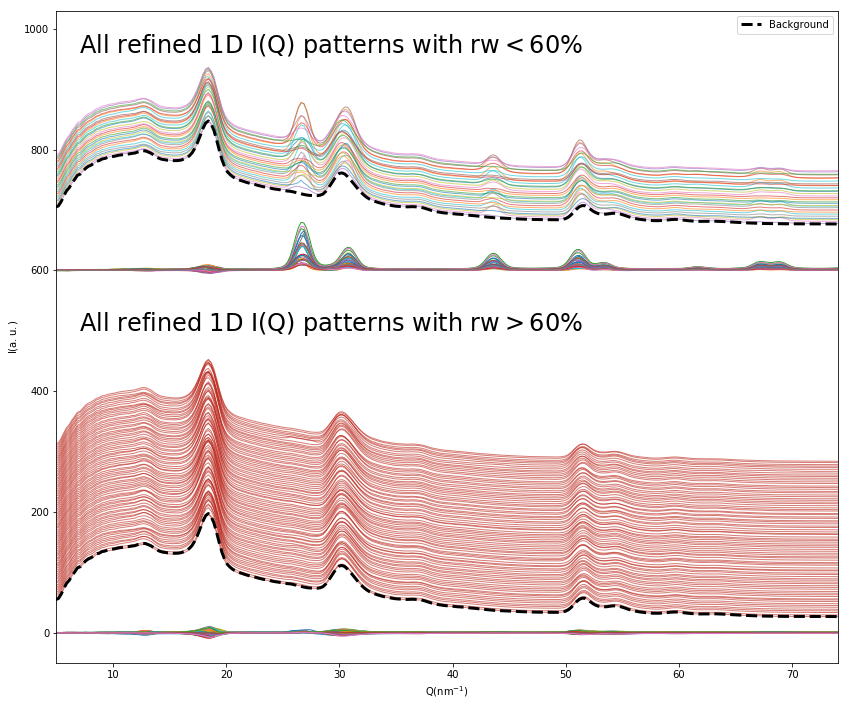

In [17]:
## Load a reference file for comparison
q, Iq = np.genfromtxt('./example_data/ref_background.txt', skip_header=4).T        

#define a figure
fig, ((ax1)) = plt.subplots(1, 1, figsize=[14,12])
offset_plot1=0
offset_plot2=0

## perform iteration and filtering by a criteria
x = d['q']
y = d['iq']
rw = d['rw']

for i in range(len(d)):
    if np.all(rw[i] < 0.6):
        ax1.plot(x[i], y[i] + 650 + offset_plot1, lw=1,alpha=0.6)
        #
        # add a difference curve
        ax1.plot(x[i], y[i]-np.interp(x[i],q,Iq)+600, lw=1) 
        offset_plot1=offset_plot1+3
        
    elif np.all(rw[i] < 1):
        ax1.plot(x[i], y[i] + offset_plot2, lw=1,alpha=0.6,color='#bb271c')
        #
        # add a difference curve
        ax1.plot(x[i], y[i]-np.interp(x[i],q,Iq),lw=1)
        offset_plot2=offset_plot2+3

#plot the reference file and adjust it to align with the data
ax1.plot(q,Iq,lw=3,ls='--',label = 'Background',color='black')
ax1.plot(q,Iq+650,lw=3,ls='--',color='black')

# set style and labels
ax1.set_xlim(5,74)
ax1.set_ylim(-50,1030)
plt.legend()
ax1.set_ylabel('I($\mathrm{a.u.}$)') 
ax1.set_xlabel('Q($\mathrm{nm^{-1}}$)')

# add annotations
ax1.text(7, 500, 'All refined 1D I(Q) patterns with $\mathrm{rw>60\%}$', fontsize=24);
ax1.text(7, 960, 'All refined 1D I(Q) patterns with $\mathrm{rw<60\%}$', fontsize=24);